In [1]:
#Create directories startingData, code, results, and figures and their README files (content directory
#should have one too) with unix

In [2]:
%%bash
rm -r sample_data 

In [3]:
%%bash
mkdir startingData code results figures

In [4]:
%%bash
cat > README.md
Complete analysis of the steatosis dataset taken from the article: Prevalence of Liver Steatosis and Fibrosis and Diagnostic Accuracy of Ultrasound in Bariatric Surgery Patients

In [5]:
%%bash
cd startingData
cat > README.md
Cleaned dataframes for both the confusion matrix (df4) and clinical characteristics (dfnew) portion of the analysis.

In [6]:
%%bash
cd code
cat > README.md
Entire code file of the analysis in ipynb format.

In [7]:
%%bash
cd results
cat > README.md
Contains all tables in the final report.

In [8]:
%%bash
cd figures
cat > README.md
Contains all figures in the final report.

In [9]:
#import all relevant libraries
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats

In [10]:
#Importing steatosis dataset
import pandas as pd
df=pd.read_csv('https://www.lerner.ccf.org/qhs/datasets/LiverSteatosis.csv')
df

,Age,Sex,Height,Weight,BMI,Obesity Duration,DM,MET Syndrome,HTN,HPL,...,CHOL,HDL,LDL,VLDL,AST,ALT,NAS,Fibrosis,LS+ US,LS+ Biopsy
0,61.2,2,162.6,127.2,48.1,35.0,0.0,1.0,1.0,1.0,...,202.0,50.0,124.0,28.0,22.0,14.0,3.0,0,1.0,1.0
1,40.4,2,165.1,137.8,50.5,23.0,1.0,1.0,1.0,1.0,...,213.0,49.0,143.0,21.0,50.0,78.0,6.0,0,0.0,1.0
2,38.5,1,193.0,217.1,58.3,11.0,1.0,1.0,1.0,0.0,...,146.0,51.0,78.0,17.0,30.0,35.0,3.0,1,1.0,1.0
3,65.0,1,161.0,131.0,50.5,20.0,1.0,1.0,1.0,0.0,...,191.0,55.0,113.0,NaN,21.0,26.0,1.0,0,1.0,1.0
4,56.3,2,165.1,124.0,45.5,22.0,0.0,1.0,1.0,0.0,...,134.0,46.0,57.0,31.0,12.0,15.0,1.0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,45.0,1,186.7,136.0,39.0,15.0,0.0,0.0,1.0,1.0,...,164.0,65.0,83.0,16.0,30.0,47.0,1.0,0,1.0,1.0
439,46.0,2,165.1,121.7,44.6,21.0,1.0,1.0,1.0,1.0,...,280.0,68.0,173.0,39.0,34.0,34.0,0.0,0,0.0,0.0
440,40.0,2,154.9,108.0,45.0,15.0,0.0,0.0,0.0,1.0,...,217.0,53.0,153.0,11.0,27.0,19.0,0.0,0,0.0,0.0
441,37.6,2,167.6,141.1,50.2,20.0,0.0,0.0,0.0,0.0,...,153.0,64.0,80.0,9.0,14.0,14.0,0.0,0,1.0,0.0


In [11]:
#checking for NaN's
df.isnull().sum()

Age                  0
Sex                  0
Height               0
Weight               0
BMI                  0
Obesity Duration     7
DM                   2
MET Syndrome         2
HTN                  3
HPL                  2
TG                  32
CHOL                32
HDL                 32
LDL                 48
VLDL                50
AST                  6
ALT                  6
NAS                 25
Fibrosis             0
LS+ US              22
LS+ Biopsy           0
dtype: int64

In [12]:
#Need to locate and eliminate rows with inconclusive gold standard diagnoses as we won't be able to determine actual diagnosis of patient with them.
df.loc[df['LS+ Biopsy'] == 0.5]

,Age,Sex,Height,Weight,BMI,Obesity Duration,DM,MET Syndrome,HTN,HPL,...,CHOL,HDL,LDL,VLDL,AST,ALT,NAS,Fibrosis,LS+ US,LS+ Biopsy
43,63.6,1,185.7,159.9,46.4,29.0,1.0,1.0,1.0,1.0,...,184.0,39.0,NaN,NaN,27.0,21.0,NaN,0,0.5,0.5
96,41.3,1,193.0,150.6,40.4,24.0,1.0,1.0,1.0,0.0,...,135.0,35.0,86.0,14.0,24.0,25.0,NaN,0,1.0,0.5
137,45.4,2,161.0,102.2,39.4,16.0,0.0,0.0,0.0,1.0,...,194.0,48.0,116.0,30.0,25.0,22.0,NaN,0,1.0,0.5
254,53.1,2,147.3,123.0,56.7,29.0,0.0,0.0,0.0,1.0,...,200.0,52.0,120.0,28.0,31.0,50.0,NaN,0,1.0,0.5
265,50.3,2,170.2,112.5,38.8,26.0,1.0,1.0,1.0,1.0,...,189.0,38.0,96.0,55.0,19.0,29.0,NaN,0,1.0,0.5
374,33.1,2,182.9,137.6,41.1,9.0,1.0,1.0,1.0,0.0,...,157.0,34.0,94.0,29.0,24.0,36.0,NaN,0,1.0,0.5
421,30.0,2,170.2,129.3,44.6,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.5
434,68.0,1,174.0,146.0,48.2,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,0.5


In [13]:
df2 = df.loc[(df['LS+ Biopsy'] != 0.5)] 
#df2

In [14]:
#Drop all rows with NaN ultrasound diagnoses since they're not available.
df3 = df2.dropna(subset=['LS+ US'])
#df3

In [15]:
df3.loc[df3['LS+ US'] == 0.5]

,Age,Sex,Height,Weight,BMI,Obesity Duration,DM,MET Syndrome,HTN,HPL,...,CHOL,HDL,LDL,VLDL,AST,ALT,NAS,Fibrosis,LS+ US,LS+ Biopsy
62,28.7,1,170.8,164.3,56.3,20.0,0.0,0.0,1.0,0.0,...,176.0,55.0,105.0,16.0,35.0,34.0,2.0,0,0.5,1.0
140,50.5,2,170.2,131.1,45.3,11.0,1.0,0.0,0.0,0.0,...,153.0,52.0,81.0,20.0,18.0,18.0,0.0,0,0.5,0.0
397,30.8,1,167.6,128.4,45.7,16.0,1.0,1.0,1.0,1.0,...,182.0,38.0,111.0,33.0,62.0,112.0,3.0,1,0.5,1.0


In [16]:
#Drop patient rows with inconclusive ultrasound diagnoses
df4 = df3.loc[(df3['LS+ US'] != 0.5)] 
df4

,Age,Sex,Height,Weight,BMI,Obesity Duration,DM,MET Syndrome,HTN,HPL,...,CHOL,HDL,LDL,VLDL,AST,ALT,NAS,Fibrosis,LS+ US,LS+ Biopsy
0,61.2,2,162.6,127.2,48.1,35.0,0.0,1.0,1.0,1.0,...,202.0,50.0,124.0,28.0,22.0,14.0,3.0,0,1.0,1.0
1,40.4,2,165.1,137.8,50.5,23.0,1.0,1.0,1.0,1.0,...,213.0,49.0,143.0,21.0,50.0,78.0,6.0,0,0.0,1.0
2,38.5,1,193.0,217.1,58.3,11.0,1.0,1.0,1.0,0.0,...,146.0,51.0,78.0,17.0,30.0,35.0,3.0,1,1.0,1.0
3,65.0,1,161.0,131.0,50.5,20.0,1.0,1.0,1.0,0.0,...,191.0,55.0,113.0,NaN,21.0,26.0,1.0,0,1.0,1.0
4,56.3,2,165.1,124.0,45.5,22.0,0.0,1.0,1.0,0.0,...,134.0,46.0,57.0,31.0,12.0,15.0,1.0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,45.0,1,186.7,136.0,39.0,15.0,0.0,0.0,1.0,1.0,...,164.0,65.0,83.0,16.0,30.0,47.0,1.0,0,1.0,1.0
439,46.0,2,165.1,121.7,44.6,21.0,1.0,1.0,1.0,1.0,...,280.0,68.0,173.0,39.0,34.0,34.0,0.0,0,0.0,0.0
440,40.0,2,154.9,108.0,45.0,15.0,0.0,0.0,0.0,1.0,...,217.0,53.0,153.0,11.0,27.0,19.0,0.0,0,0.0,0.0
441,37.6,2,167.6,141.1,50.2,20.0,0.0,0.0,0.0,0.0,...,153.0,64.0,80.0,9.0,14.0,14.0,0.0,0,1.0,0.0


In [108]:
df4.to_csv('/content/startingData/SteatosisDataset_ConfusionMatrix.csv')

In [17]:
df4.isnull().sum()

Age                  0
Sex                  0
Height               0
Weight               0
BMI                  0
Obesity Duration     6
DM                   0
MET Syndrome         0
HTN                  1
HPL                  0
TG                  23
CHOL                23
HDL                 23
LDL                 38
VLDL                40
AST                  3
ALT                  3
NAS                 15
Fibrosis             0
LS+ US               0
LS+ Biopsy           0
dtype: int64

In [18]:
#Count/Probability Matrix
countMatrix = pd.crosstab(df4['LS+ Biopsy'], df4['LS+ US'],margins=True) #(rownames=['Actual'], colnames=['Predicted'])
countMatrix

LS+ US,0.0,1.0,All
LS+ Biopsy,,,
0.0,81,38,119
1.0,40,251,291
All,121,289,410


In [117]:
#Create a Confusion Matrix with Biopsy and Ultrasound Results
confusionSteatosisMatrix = pd.crosstab(df4['LS+ US'], df4['LS+ Biopsy'])
#conventionalOrder = ['Steatosis', 'No Steatosis']
#confusionMatrix = confusionMatrix.reindex(index=conventionalOrder, columns=conventionalOrder)
print(confusionSteatosisMatrix)
plt.savefig("/content/results/Table1.pdf")

LS+ Biopsy  0.0  1.0
LS+ US              
0.0          81   40
1.0          38  251


<Figure size 432x288 with 0 Axes>

In [20]:
#Create a Count Matrix with margin counts included
countSteatosisMatrix = pd.crosstab( df4['LS+ US'], df4['LS+ Biopsy'], margins=True)
countSteatosisMatrix

LS+ Biopsy,0.0,1.0,All
LS+ US,,,
0.0,81,40,121
1.0,38,251,289
All,119,291,410


In [21]:
chi2, p, dof, expected = stats.chi2_contingency(countSteatosisMatrix)
print(f"Chi2 Statistic: {chi2:.5g}")
print(f"p-value: {p:.5g}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies: ")

Chi2 Statistic: 119.81
p-value: 5.8715e-25
Degrees of Freedom: 4
Expected Frequencies: 


In [116]:
#make a copy of countSteatosisMatrix
countSteatosisMatrix_copy = countSteatosisMatrix.copy()

#define number of rows and columns in countSteatosisMatrix
numberOfRows = len(countSteatosisMatrix_copy.index)
numberOfColumns = len(countSteatosisMatrix_copy)

#define total number of patients in countSteatosisMatrix
totalnumberOfPatients=countSteatosisMatrix.iloc[len(countSteatosisMatrix.index) - 1,len(countSteatosisMatrix) - 1]

#loop start --------------------------------------------------------------------
#create a for loop for each cell in countSteatosisMatrix_copy
for rowIndex in range(0,numberOfRows):
  for columnIndex in range(0,numberOfColumns):
    
    #for each cell in the DataFrame2 define it by the corresponding cell in Dataframe and divide it by total number of patients
    countSteatosisMatrix_copy.iloc[rowIndex,columnIndex] = countSteatosisMatrix.iloc[rowIndex,columnIndex]/totalnumberOfPatients
#loop end ----------------------------------------------------------------------

#print countSteatosisMatrix_copy Probability Matrix
print(countSteatosisMatrix_copy)
plt.savefig("/content/results/Table3.pdf")

LS+ Biopsy       0.0       1.0       All
LS+ US                                  
0.0         0.197561  0.097561  0.295122
1.0         0.092683  0.612195  0.704878
All         0.290244  0.709756  1.000000


<Figure size 432x288 with 0 Axes>

In [23]:
def confusionMatrixMetrics(confusionMatrix):
   """
   Calculate and return a Pandas DataFrame with various metrics from a given confusion matrix.

   Args:
    confusionMatrix (pandas.DataFrame): A confusion matrix of actual and predicted outcomes.
   """
   # Save the True/False Positive/Negative values from the input confusion matrix.
   TN = confusionMatrix.iloc[0][0]
   FN = confusionMatrix.iloc[0][1] 
   TP = confusionMatrix.iloc[1][1]
   FP = confusionMatrix.iloc[1][0]

   # Calculate various metrics.
   Population = TN+FN+TP+FP
   Prevalence = (TP+FP) / Population
   PPV = TP / (TP+FP)
   NPV = TN / (TN+FN)
   Sensitivity = TP / (TP+FN)
   Specificity = TN / (TN+FP) 
   FPR = FP / (TN+FP)
   FNR = FN / (TP+FN)

   # Create a new DataFrame storing to store the metrics.
   df = pd.DataFrame({'Metric':
                      ['TP', 'TN', 'FP', 'FN',
                       'Prevalence', 'PPV', 'NPV',
                       'Sensitivity', 'Specificity',
                       'FPR', 'FNR'],
                      'Value':
                      [TP, TN, FP, FN,
                       Prevalence, PPV, NPV,
                       Sensitivity, Specificity,
                       FPR, FNR]})
   df = df.set_index('Metric')
   
   return (df)

In [115]:
print(confusionMatrixMetrics(confusionSteatosisMatrix))
plt.savefig("/content/results/Table2.pdf")

                  Value
Metric                 
TP           251.000000
TN            81.000000
FP            38.000000
FN            40.000000
Prevalence     0.704878
PPV            0.868512
NPV            0.669421
Sensitivity    0.862543
Specificity    0.680672
FPR            0.319328
FNR            0.137457


<Figure size 432x288 with 0 Axes>

In [25]:
#Drop rest of NaN values in df4 to create new cleaned dataframe dfCleaned
dfCleaned=df4.dropna(how='any')
dfCleaned

,Age,Sex,Height,Weight,BMI,Obesity Duration,DM,MET Syndrome,HTN,HPL,...,CHOL,HDL,LDL,VLDL,AST,ALT,NAS,Fibrosis,LS+ US,LS+ Biopsy
0,61.2,2,162.6,127.2,48.1,35.0,0.0,1.0,1.0,1.0,...,202.0,50.0,124.0,28.0,22.0,14.0,3.0,0,1.0,1.0
1,40.4,2,165.1,137.8,50.5,23.0,1.0,1.0,1.0,1.0,...,213.0,49.0,143.0,21.0,50.0,78.0,6.0,0,0.0,1.0
2,38.5,1,193.0,217.1,58.3,11.0,1.0,1.0,1.0,0.0,...,146.0,51.0,78.0,17.0,30.0,35.0,3.0,1,1.0,1.0
4,56.3,2,165.1,124.0,45.5,22.0,0.0,1.0,1.0,0.0,...,134.0,46.0,57.0,31.0,12.0,15.0,1.0,0,0.0,1.0
5,69.0,2,165.1,117.6,43.2,24.0,1.0,1.0,1.0,1.0,...,169.0,43.0,93.0,33.0,18.0,19.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,45.0,1,186.7,136.0,39.0,15.0,0.0,0.0,1.0,1.0,...,164.0,65.0,83.0,16.0,30.0,47.0,1.0,0,1.0,1.0
439,46.0,2,165.1,121.7,44.6,21.0,1.0,1.0,1.0,1.0,...,280.0,68.0,173.0,39.0,34.0,34.0,0.0,0,0.0,0.0
440,40.0,2,154.9,108.0,45.0,15.0,0.0,0.0,0.0,1.0,...,217.0,53.0,153.0,11.0,27.0,19.0,0.0,0,0.0,0.0
441,37.6,2,167.6,141.1,50.2,20.0,0.0,0.0,0.0,0.0,...,153.0,64.0,80.0,9.0,14.0,14.0,0.0,0,1.0,0.0


In [26]:
dfCleaned['Height'].median()
#dfCleaned['Height'].mean()
#dfCleaned['Height'].mode()

167.3

In [27]:
#false negative 40 patients
df5 = dfCleaned.loc[(dfCleaned['LS+ US'] == 0.0) & (dfCleaned['LS+ Biopsy'] == 1.0)]

In [28]:
#false positive 38 patients
df6 = dfCleaned.loc[(dfCleaned['LS+ US'] == 1.0) & (dfCleaned['LS+ Biopsy'] == 0.0)]

In [29]:
#true negative 81 patients
df7 = dfCleaned.loc[(df4['LS+ US'] == 0.0) & (dfCleaned['LS+ Biopsy'] == 0.0)]

In [30]:
#true positive 251 patients
df8 = dfCleaned.loc[(dfCleaned['LS+ US'] == 1.0) & (dfCleaned['LS+ Biopsy'] == 1.0)]

In [31]:
dfnew = dfCleaned.copy()

In [32]:
#true positive
dfnew.loc[(dfCleaned['LS+ US'] == 1.0) & (dfCleaned['LS+ Biopsy'] == 1.0), 'Confusion Matrix'] = 'TP'
dfTP = dfnew.loc[(dfCleaned['LS+ US'] == 1.0) & (dfCleaned['LS+ Biopsy'] == 1.0)]

In [33]:
#false negative 
dfnew.loc[(dfCleaned['LS+ US'] == 0.0) & (dfCleaned['LS+ Biopsy'] == 1.0), 'Confusion Matrix'] = 'FN'
dfFN = dfnew.loc[(dfCleaned['LS+ US'] == 0.0) & (dfCleaned['LS+ Biopsy'] == 1.0)]

In [34]:
#true negative
dfnew.loc[(dfCleaned['LS+ US'] == 0.0) & (dfCleaned['LS+ Biopsy'] == 0.0), 'Confusion Matrix'] = 'TN'
dfTN = dfnew.loc[(dfCleaned['LS+ US'] == 0.0) & (dfCleaned['LS+ Biopsy'] == 0.0)]

In [35]:
#false positive
dfnew.loc[(dfCleaned['LS+ US'] == 1.0) & (dfCleaned['LS+ Biopsy'] == 0.0), 'Confusion Matrix'] = 'FP'
dfFP = dfnew.loc[(dfCleaned['LS+ US'] == 1.0) & (dfCleaned['LS+ Biopsy'] == 0.0)]

In [36]:
#dfnew adds column with ultrasound diagnosis result accuracy based off of confusion matrix
dfnew

,Age,Sex,Height,Weight,BMI,Obesity Duration,DM,MET Syndrome,HTN,HPL,...,HDL,LDL,VLDL,AST,ALT,NAS,Fibrosis,LS+ US,LS+ Biopsy,Confusion Matrix
0,61.2,2,162.6,127.2,48.1,35.0,0.0,1.0,1.0,1.0,...,50.0,124.0,28.0,22.0,14.0,3.0,0,1.0,1.0,TP
1,40.4,2,165.1,137.8,50.5,23.0,1.0,1.0,1.0,1.0,...,49.0,143.0,21.0,50.0,78.0,6.0,0,0.0,1.0,FN
2,38.5,1,193.0,217.1,58.3,11.0,1.0,1.0,1.0,0.0,...,51.0,78.0,17.0,30.0,35.0,3.0,1,1.0,1.0,TP
4,56.3,2,165.1,124.0,45.5,22.0,0.0,1.0,1.0,0.0,...,46.0,57.0,31.0,12.0,15.0,1.0,0,0.0,1.0,FN
5,69.0,2,165.1,117.6,43.2,24.0,1.0,1.0,1.0,1.0,...,43.0,93.0,33.0,18.0,19.0,0.0,0,0.0,0.0,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,45.0,1,186.7,136.0,39.0,15.0,0.0,0.0,1.0,1.0,...,65.0,83.0,16.0,30.0,47.0,1.0,0,1.0,1.0,TP
439,46.0,2,165.1,121.7,44.6,21.0,1.0,1.0,1.0,1.0,...,68.0,173.0,39.0,34.0,34.0,0.0,0,0.0,0.0,TN
440,40.0,2,154.9,108.0,45.0,15.0,0.0,0.0,0.0,1.0,...,53.0,153.0,11.0,27.0,19.0,0.0,0,0.0,0.0,TN
441,37.6,2,167.6,141.1,50.2,20.0,0.0,0.0,0.0,0.0,...,64.0,80.0,9.0,14.0,14.0,0.0,0,1.0,0.0,FP


In [109]:
dfnew.to_csv('/content/startingData/SteatosisDataset_ClinicalCharacteristics.csv')

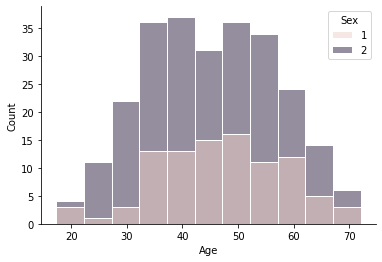

In [120]:
axes = sns.histplot(data=dfnew, x='Age',edgecolor='white', hue='Sex')
axes.set(ylabel='Count', xlabel='Age')
sns.despine()
plt.savefig("/content/figures/Figure1.pdf", bbox_inches='tight')

In [38]:
#Define total number of patients in dfnew
totalnumberOfPatients2 = 350

In [118]:
#Generate 2x2 contingency table/probability matrix for liver biopsy results of patients stratified by gender
sexdemographicsSteatosisMatrix = (pd.crosstab(dfnew['Sex'], dfnew['LS+ Biopsy'], margins=True))
print(sexdemographicsSteatosisMatrix)
plt.savefig("/content/results/Table4.pdf")

LS+ Biopsy  0.0  1.0  All
Sex                      
1            19   76   95
2            74  181  255
All          93  257  350


<Figure size 432x288 with 0 Axes>

In [40]:
#first value: chi2, second value: p-value
chi2, p, dof, expected = stats.chi2_contingency(sexdemographicsSteatosisMatrix)
print(f"Chi2 Statistic: {chi2:.5g}")
print(f"p-value: {p:.5g}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies: ")

Chi2 Statistic: 2.886
p-value: 0.57709
Degrees of Freedom: 4
Expected Frequencies: 


In [119]:
sexdemographicsProbSteatosisMatrix = (pd.crosstab(dfnew['Sex'], dfnew['LS+ Biopsy'], margins=True))/totalnumberOfPatients2
print(sexdemographicsProbSteatosisMatrix)
plt.savefig("/content/results/Table5.pdf")

LS+ Biopsy       0.0       1.0       All
Sex                                     
1           0.054286  0.217143  0.271429
2           0.211429  0.517143  0.728571
All         0.265714  0.734286  1.000000


<Figure size 432x288 with 0 Axes>

In [42]:
DMdemographicsSteatosisMatrix = pd.crosstab(dfnew['DM'], dfnew['LS+ Biopsy'], margins=True)
DMdemographicsSteatosisMatrix

LS+ Biopsy,0.0,1.0,All
DM,,,
0.0,48,95,143
1.0,45,162,207
All,93,257,350


In [43]:
chi2, p, dof, expected = stats.chi2_contingency(DMdemographicsSteatosisMatrix)
print(f"Chi2 Statistic: {chi2:.5g}")
print(f"p-value: {p:.5g}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies: ")

Chi2 Statistic: 6.0636
p-value: 0.19445
Degrees of Freedom: 4
Expected Frequencies: 


In [44]:
DMdemographicsProbSteatosisMatrix = pd.crosstab(dfnew['DM'], dfnew['LS+ Biopsy'], margins=True)/totalnumberOfPatients2
DMdemographicsProbSteatosisMatrix

LS+ Biopsy,0.0,1.0,All
DM,,,
0.0,0.137143,0.271429,0.408571
1.0,0.128571,0.462857,0.591429
All,0.265714,0.734286,1.000000


In [45]:
METdemographicsSteatosisMatrix = pd.crosstab(dfnew['MET Syndrome'], dfnew['LS+ Biopsy'], margins=True)
METdemographicsSteatosisMatrix

LS+ Biopsy,0.0,1.0,All
MET Syndrome,,,
0.0,44,74,118
1.0,49,183,232
All,93,257,350


In [46]:
chi2, p, dof, expected = stats.chi2_contingency(METdemographicsSteatosisMatrix)
print(f"Chi2 Statistic: {chi2:.5g}")
print(f"p-value: {p:.5g}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies: ")

Chi2 Statistic: 10.479
p-value: 0.033093
Degrees of Freedom: 4
Expected Frequencies: 


In [47]:
METdemographicsProbSteatosisMatrix = pd.crosstab(dfnew['MET Syndrome'], dfnew['LS+ Biopsy'], margins=True)/totalnumberOfPatients2
METdemographicsProbSteatosisMatrix

LS+ Biopsy,0.0,1.0,All
MET Syndrome,,,
0.0,0.125714,0.211429,0.337143
1.0,0.140000,0.522857,0.662857
All,0.265714,0.734286,1.000000


In [48]:
HTNdemographicsSteatosisMatrix = pd.crosstab(dfnew['HTN'], dfnew['LS+ Biopsy'], margins=True)
HTNdemographicsSteatosisMatrix

LS+ Biopsy,0.0,1.0,All
HTN,,,
0.0,42,89,131
1.0,51,168,219
All,93,257,350


In [49]:
chi2, p, dof, expected = stats.chi2_contingency(HTNdemographicsSteatosisMatrix)
print(f"Chi2 Statistic: {chi2:.5g}")
print(f"p-value: {p:.5g}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies: ")

Chi2 Statistic: 3.2337
p-value: 0.5195
Degrees of Freedom: 4
Expected Frequencies: 


In [50]:
HTNdemographicsProbSteatosisMatrix = pd.crosstab(dfnew['HTN'], dfnew['LS+ Biopsy'], margins=True)/totalnumberOfPatients2
HTNdemographicsProbSteatosisMatrix

LS+ Biopsy,0.0,1.0,All
HTN,,,
0.0,0.120000,0.254286,0.374286
1.0,0.145714,0.480000,0.625714
All,0.265714,0.734286,1.000000


In [51]:
HPLdemographicsSteatosisMatrix = pd.crosstab(dfnew['HPL'], dfnew['LS+ Biopsy'], margins=True)
HPLdemographicsSteatosisMatrix

LS+ Biopsy,0.0,1.0,All
HPL,,,
0.0,38,92,130
1.0,55,165,220
All,93,257,350


In [52]:
chi2, p, dof, expected = stats.chi2_contingency(HPLdemographicsSteatosisMatrix)
print(f"Chi2 Statistic: {chi2:.5g}")
print(f"p-value: {p:.5g}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies: ")

Chi2 Statistic: 0.74965
p-value: 0.94507
Degrees of Freedom: 4
Expected Frequencies: 


In [53]:
HPLdemographicsProbSteatosisMatrix = pd.crosstab(dfnew['HPL'], dfnew['LS+ Biopsy'], margins=True)/totalnumberOfPatients2
HPLdemographicsProbSteatosisMatrix

LS+ Biopsy,0.0,1.0,All
HPL,,,
0.0,0.108571,0.262857,0.371429
1.0,0.157143,0.471429,0.628571
All,0.265714,0.734286,1.000000


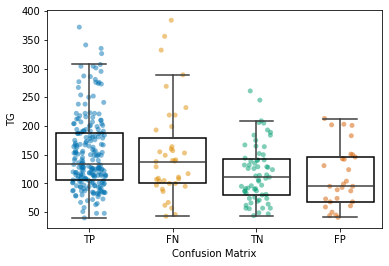

In [54]:
sns.boxplot(data=dfnew, x='Confusion Matrix', y='TG',fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data=dfnew, x='Confusion Matrix', y='TG', alpha=.5, jitter=.2, zorder=0, palette = 'colorblind')

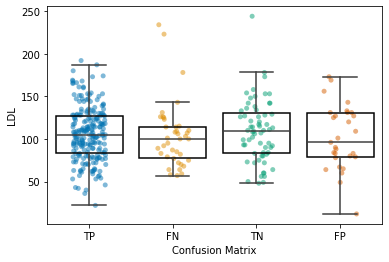

In [55]:
sns.boxplot(data=dfnew, x='Confusion Matrix', y='LDL',fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data=dfnew, x='Confusion Matrix', y='LDL', alpha=.5, jitter=.2, zorder=0, palette = 'colorblind')

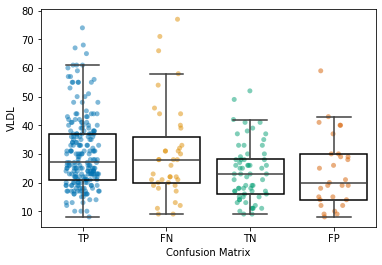

In [56]:
sns.boxplot(data=dfnew, x='Confusion Matrix', y='VLDL',fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data=dfnew, x='Confusion Matrix', y='VLDL', alpha=.5, jitter=.2, zorder=0, palette = 'colorblind')

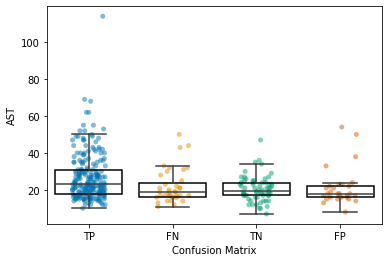

In [129]:
sns.boxplot(data=dfnew, x='Confusion Matrix', y='AST',fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data=dfnew, x='Confusion Matrix', y='AST', alpha=.5, jitter=.2, zorder=0, palette = 'colorblind')
plt.savefig("/content/figures/Figure10.pdf", bbox_inches='tight')

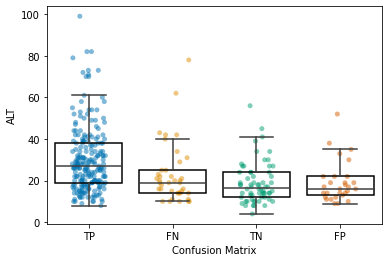

In [130]:
sns.boxplot(data=dfnew, x='Confusion Matrix', y='ALT',fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data=dfnew, x='Confusion Matrix', y='ALT', alpha=.5, jitter=.2, zorder=0, palette = 'colorblind')
plt.savefig("/content/figures/Figure11.pdf", bbox_inches='tight')

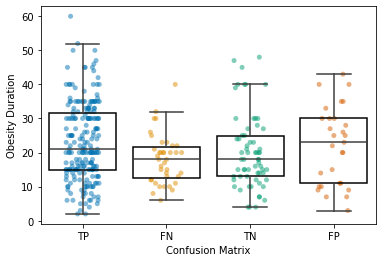

In [131]:
sns.boxplot(data=dfnew, x='Confusion Matrix', y='Obesity Duration',fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data=dfnew, x='Confusion Matrix', y='Obesity Duration', alpha=.5, jitter=.2, zorder=0, palette = 'colorblind')
plt.savefig("/content/figures/Figure12.pdf", bbox_inches='tight')

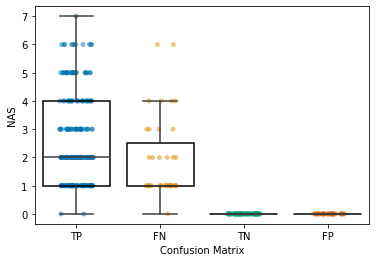

In [132]:
sns.boxplot(data=dfnew, x='Confusion Matrix', y='NAS',fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data=dfnew, x='Confusion Matrix', y='NAS', alpha=.5, jitter=.2, zorder=0, palette = 'colorblind')
plt.savefig("/content/figures/Figure13.pdf", bbox_inches='tight')

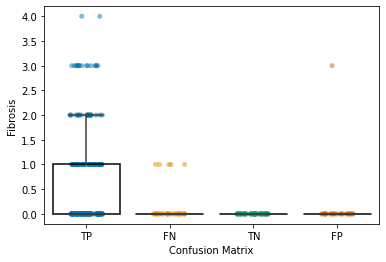

In [133]:
sns.boxplot(data=dfnew, x='Confusion Matrix', y='Fibrosis',fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data=dfnew, x='Confusion Matrix', y='Fibrosis', alpha=.5, jitter=.2, zorder=0, palette = 'colorblind')
plt.savefig("/content/figures/Figure14.pdf", bbox_inches='tight')

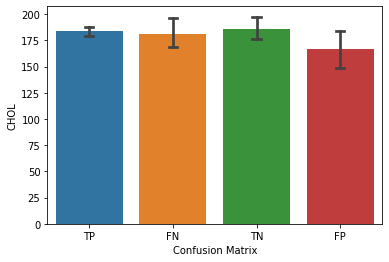

In [121]:
sns.barplot(data=dfnew,x='Confusion Matrix',y='CHOL', capsize=0.1)
plt.savefig("/content/figures/Figure2.pdf", bbox_inches='tight')

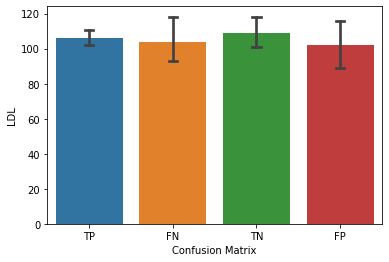

In [122]:
sns.barplot(data=dfnew,x='Confusion Matrix',y='LDL', capsize=0.1)
plt.savefig("/content/figures/Figure3.pdf", bbox_inches='tight')

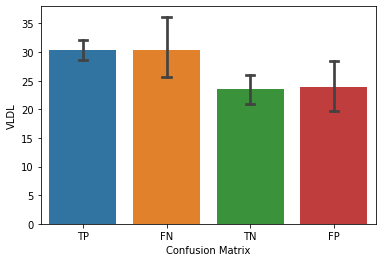

In [123]:
sns.barplot(data=dfnew,x='Confusion Matrix',y='VLDL', capsize=0.1)
plt.savefig("/content/figures/Figure4.pdf", bbox_inches='tight')

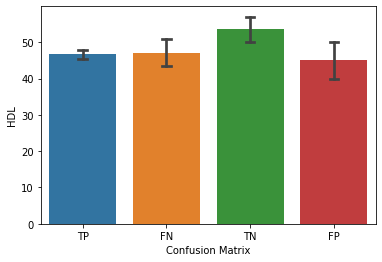

In [124]:
sns.barplot(data=dfnew,x='Confusion Matrix',y='HDL', capsize=0.1)
plt.savefig("/content/figures/Figure5.pdf", bbox_inches='tight')

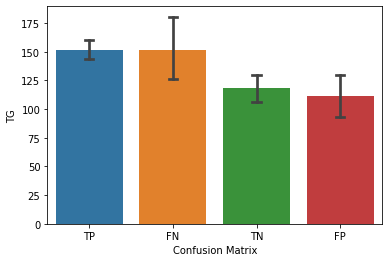

In [125]:
sns.barplot(data=dfnew,x='Confusion Matrix',y='TG', capsize=0.1)
plt.savefig("/content/figures/Figure6.pdf", bbox_inches='tight')

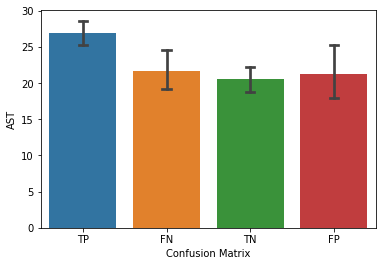

In [126]:
sns.barplot(data=dfnew,x='Confusion Matrix',y='AST', capsize=0.1)
plt.savefig("/content/figures/Figure7.pdf", bbox_inches='tight')

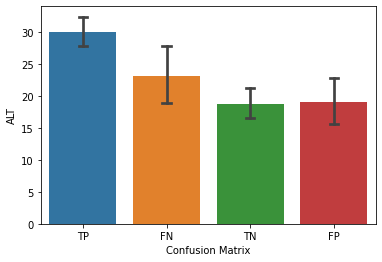

In [127]:
sns.barplot(data=dfnew,x='Confusion Matrix',y='ALT', capsize=0.1)
plt.savefig("/content/figures/Figure8.pdf", bbox_inches='tight')

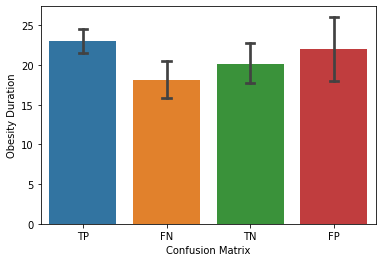

In [128]:
sns.barplot(data=dfnew,x='Confusion Matrix',y='Obesity Duration', capsize=0.1)
plt.savefig("/content/figures/Figure9.pdf", bbox_inches='tight')

In [70]:
dfnewSteatosisMatrix = (pd.crosstab(dfnew['LS+ US'], dfnew['LS+ Biopsy'], margins=True))
dfnewSteatosisMatrix

LS+ Biopsy,0.0,1.0,All
LS+ US,,,
0.0,64,39,103
1.0,29,218,247
All,93,257,350


In [71]:
#Kolmogorov–Smirnov test to test normal distribution in population with unknown variance for t test (n>50)
#alpha level =0.05
stats.kstest(dfTP['Obesity Duration'], 'norm') 

KstestResult(statistic=0.9894757900417643, pvalue=0.0)

In [72]:
#Shapiro-Wilkes test to test normal distribution in population with unknown variance for t test (n>50)
#alpha level =0.05
stats.shapiro(dfFN['Obesity Duration'])

ShapiroResult(statistic=0.9510392546653748, pvalue=0.08907622843980789)

In [73]:
#Mann-Whitney U Test done to determine if clinical characteristic differences between TP and FN patient groups (nonparametric) are statistically significant 
stats.mannwhitneyu(dfTP['Obesity Duration'], dfFN['Obesity Duration'], alternative = 'greater')

MannwhitneyuResult(statistic=5329.5, pvalue=0.0057897203490049195)

In [74]:
stats.kstest(dfTP['CHOL'], 'norm') 

KstestResult(statistic=1.0, pvalue=0.0)

In [75]:
stats.shapiro(dfFN['CHOL'])

ShapiroResult(statistic=0.8750214576721191, pvalue=0.00045728744589723647)

In [76]:
stats.mannwhitneyu(dfTP['CHOL'], dfFN['CHOL'], alternative = 'greater')

MannwhitneyuResult(statistic=4630.5, pvalue=0.18766667374890073)

In [77]:
stats.kstest(dfTP['LDL'], 'norm') 

KstestResult(statistic=1.0, pvalue=0.0)

In [78]:
stats.shapiro(dfFN['LDL'])

ShapiroResult(statistic=0.8397706151008606, pvalue=6.210986612131819e-05)

In [79]:
stats.mannwhitneyu(dfTP['LDL'], dfFN['LDL'], alternative = 'greater')

MannwhitneyuResult(statistic=4787.5, pvalue=0.10495713287022301)

In [80]:
stats.kstest(dfTP['TG'], 'norm') 

KstestResult(statistic=1.0, pvalue=0.0)

In [81]:
stats.shapiro(dfFN['TG'])

ShapiroResult(statistic=0.8827981352806091, pvalue=0.0007349114748649299)

In [82]:
stats.mannwhitneyu(dfTP['TG'], dfFN['TG'], alternative = 'greater')

MannwhitneyuResult(statistic=4521.0, pvalue=0.2642242107901606)

In [83]:
stats.kstest(dfTP['VLDL'], 'norm') 

KstestResult(statistic=0.9999999999999993, pvalue=0.0)

In [84]:
stats.shapiro(dfFN['VLDL'])

ShapiroResult(statistic=0.8843219876289368, pvalue=0.000807794916909188)

In [85]:
stats.mannwhitneyu(dfTP['VLDL'], dfFN['VLDL'], alternative = 'greater')

MannwhitneyuResult(statistic=4524.0, pvalue=0.2618372801989842)

In [86]:
stats.kstest(dfTP['HDL'], 'norm') 

KstestResult(statistic=1.0, pvalue=0.0)

In [87]:
stats.shapiro(dfFN['HDL'])

ShapiroResult(statistic=0.9617977142333984, pvalue=0.20465655624866486)

In [88]:
stats.mannwhitneyu(dfTP['HDL'], dfFN['HDL'], alternative = 'greater')

MannwhitneyuResult(statistic=4178.0, pvalue=0.5682877275621815)

In [89]:
stats.kstest(dfTP['AST'], 'norm') 

KstestResult(statistic=1.0, pvalue=0.0)

In [90]:
stats.shapiro(dfFN['AST'])

ShapiroResult(statistic=0.8198966383934021, pvalue=2.2197486032382585e-05)

In [91]:
stats.mannwhitneyu(dfTP['AST'], dfFN['AST'], alternative = 'greater')

MannwhitneyuResult(statistic=5516.0, pvalue=0.0015368084418545713)

In [92]:
stats.kstest(dfTP['ALT'], 'norm') 

KstestResult(statistic=0.9999999999999993, pvalue=0.0)

In [93]:
stats.shapiro(dfFN['ALT'])

ShapiroResult(statistic=0.7747079730033875, pvalue=2.6352449822297785e-06)

In [94]:
stats.mannwhitneyu(dfTP['ALT'], dfFN['ALT'], alternative = 'greater')

MannwhitneyuResult(statistic=5686.5, pvalue=0.00039257851398279495)

In [95]:
#Levene Test to test equality in variances 
#worsening = df.loc[df['WHF'] == 1]
#notWorsening = df.loc[df['WHF'] == 0]

#stats.levene(worsening['NHOSP'], notWorsening['NHOSP'])

In [96]:
#Push the local repository and all the created files and directories onto the Lab8 public repository on Github
#using private key and public keyhole.

In [97]:
#%%bash
#cat > .gitignore
#.*
#.gitignore

In [98]:
#%%bash
#git config --global user.email "alextai@usc.edu"
#git config --global user.name "Alex Tai"

In [99]:
#%%bash
#git init

In [100]:
#%%bash
#git add -A

In [101]:
#%%bash
#git commit -m "Added Final Project"

In [102]:
#%%bash
#ssh-keygen -t ed25519 -C '[alextai@usc.edu]' -f ~/.ssh/id_ed25519 -P ''
#cat > ~/.ssh/config
#Host *
  #AddKeysToAgent yes
  #IdentityFile ~/.ssh/id_ed25519

In [103]:
#%%bash
#cat ~/.ssh/id_ed25519

In [104]:
#%%bash
#eval "$(ssh-agent -s)"
#ssh-add ~/.ssh/id_ed25519

In [105]:
#%%bash
#cat ~/.ssh/id_ed25519.pub

#paste output from here to github creating a new key

In [106]:
#%%bash
#sudo ssh -o "StrictHostKeyChecking no" -T git@github.com | exit 0

In [107]:
#%%bash

#git remote add origin git@github.com:alextai24/FinalProject.git
#git branch -M main
#git push -u origin main